In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

#from acquire import get_telco_data
#from prepare import telco_prep
import acquire
import explore
import prepare

# Acquire

In [2]:
df = acquire.get_telco_data()
print(df.shape)
df.head()

(7043, 24)


,internet_service_type_id,contract_type_id,payment_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
0,1,1,2,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Mailed check,Month-to-month,DSL
1,1,1,4,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Credit card (automatic),Month-to-month,DSL
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,Electronic check,Month-to-month,DSL
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.1,25.1,Yes,Electronic check,Month-to-month,DSL
4,1,1,3,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.5,30.5,Yes,Bank transfer (automatic),Month-to-month,DSL


In [3]:
# Inspect values and dtypes.

for col in df.columns:
    print(col)
    print(df[col].value_counts(dropna=False))
    print('----------')

internet_service_type_id
2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64
----------
contract_type_id
1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64
----------
payment_type_id
1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64
----------
customer_id
9693-XMUOB    1
5840-NVDCG    1
0208-BPQEJ    1
7758-UJWYS    1
5789-LDFXO    1
             ..
5159-YFPKQ    1
5599-HVLTW    1
4006-HKYHO    1
4129-LYCOI    1
8499-BRXTD    1
Name: customer_id, Length: 7043, dtype: int64
----------
gender
Male      3555
Female    3488
Name: gender, dtype: int64
----------
senior_citizen
0    5901
1    1142
Name: senior_citizen, dtype: int64
----------
partner
No     3641
Yes    3402
Name: partner, dtype: int64
----------
dependents
No     4933
Yes    2110
Name: dependents, dtype: int64
----------
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73,

In [4]:
df.columns.tolist()

['internet_service_type_id',
 'contract_type_id',
 'payment_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'payment_type',
 'contract_type',
 'internet_service_type']

## Acquire Takeaways

- After examining the values and data types of the data I acquired, I want to do the following in prepare:

    - Convert 'online_security','online_backup', 'device_protection', 'tech_support' from `yes` and `no` values to 1 and 0.
    
    - I'm going to drop `total_charges` because it is calculated from `monthly_charges` and `tenure_months`.
    
    - I'm going to drop `customer_id`.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
internet_service_type_id    7043 non-null int64
contract_type_id            7043 non-null int64
payment_type_id             7043 non-null int64
customer_id                 7043 non-null object
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null object
dependents                  7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null object
multiple_lines              7043 non-null object
online_security             7043 non-null object
online_backup               7043 non-null object
device_protection           7043 non-null object
tech_support                7043 non-null object
streaming_tv                7043 non-null object
streaming_movies            7043 non-null object
paperless_billing           7043 non-null object
monthly_charges 

In [6]:
df.nunique()

internet_service_type_id       3
contract_type_id               3
payment_type_id                4
customer_id                 7043
gender                         2
senior_citizen                 2
partner                        2
dependents                     2
tenure                        73
phone_service                  2
multiple_lines                 3
online_security                3
online_backup                  3
device_protection              3
tech_support                   3
streaming_tv                   3
streaming_movies               3
paperless_billing              2
monthly_charges             1585
total_charges               6531
churn                          2
payment_type                   4
contract_type                  3
internet_service_type          3
dtype: int64

In [7]:
df.describe(include='all')

,internet_service_type_id,contract_type_id,payment_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
count,7043.000000,7043.000000,7043.000000,7043,7043,7043.000000,7043,7043,7043.000000,7043,...,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043,7043
unique,NaN,NaN,NaN,7043,2,NaN,2,2,NaN,2,...,3,3,3,2,NaN,6531,2,4,3,3
top,NaN,NaN,NaN,9693-XMUOB,Male,NaN,No,No,NaN,Yes,...,No,No,No,Yes,NaN,20.2,No,Electronic check,Month-to-month,Fiber optic
freq,NaN,NaN,NaN,1,3555,NaN,3641,4933,NaN,6361,...,3473,2810,2785,4171,NaN,11,5174,2365,3875,3096
mean,1.872923,1.690473,2.315633,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,...,NaN,NaN,NaN,NaN,64.761692,NaN,NaN,NaN,NaN,NaN
std,0.737796,0.833755,1.148907,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,...,NaN,NaN,NaN,NaN,30.090047,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,NaN,NaN,NaN
25%,1.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,...,NaN,NaN,NaN,NaN,35.500000,NaN,NaN,NaN,NaN,NaN
50%,2.000000,1.000000,2.000000,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,...,NaN,NaN,NaN,NaN,70.350000,NaN,NaN,NaN,NaN,NaN
75%,2.000000,2.000000,3.000000,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,...,NaN,NaN,NaN,NaN,89.850000,NaN,NaN,NaN,NaN,NaN


In [8]:
# Print a concise summary of our telco df - the column dtypes, non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
internet_service_type_id    7043 non-null int64
contract_type_id            7043 non-null int64
payment_type_id             7043 non-null int64
customer_id                 7043 non-null object
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null object
dependents                  7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null object
multiple_lines              7043 non-null object
online_security             7043 non-null object
online_backup               7043 non-null object
device_protection           7043 non-null object
tech_support                7043 non-null object
streaming_tv                7043 non-null object
streaming_movies            7043 non-null object
paperless_billing           7043 non-null object
monthly_charges 

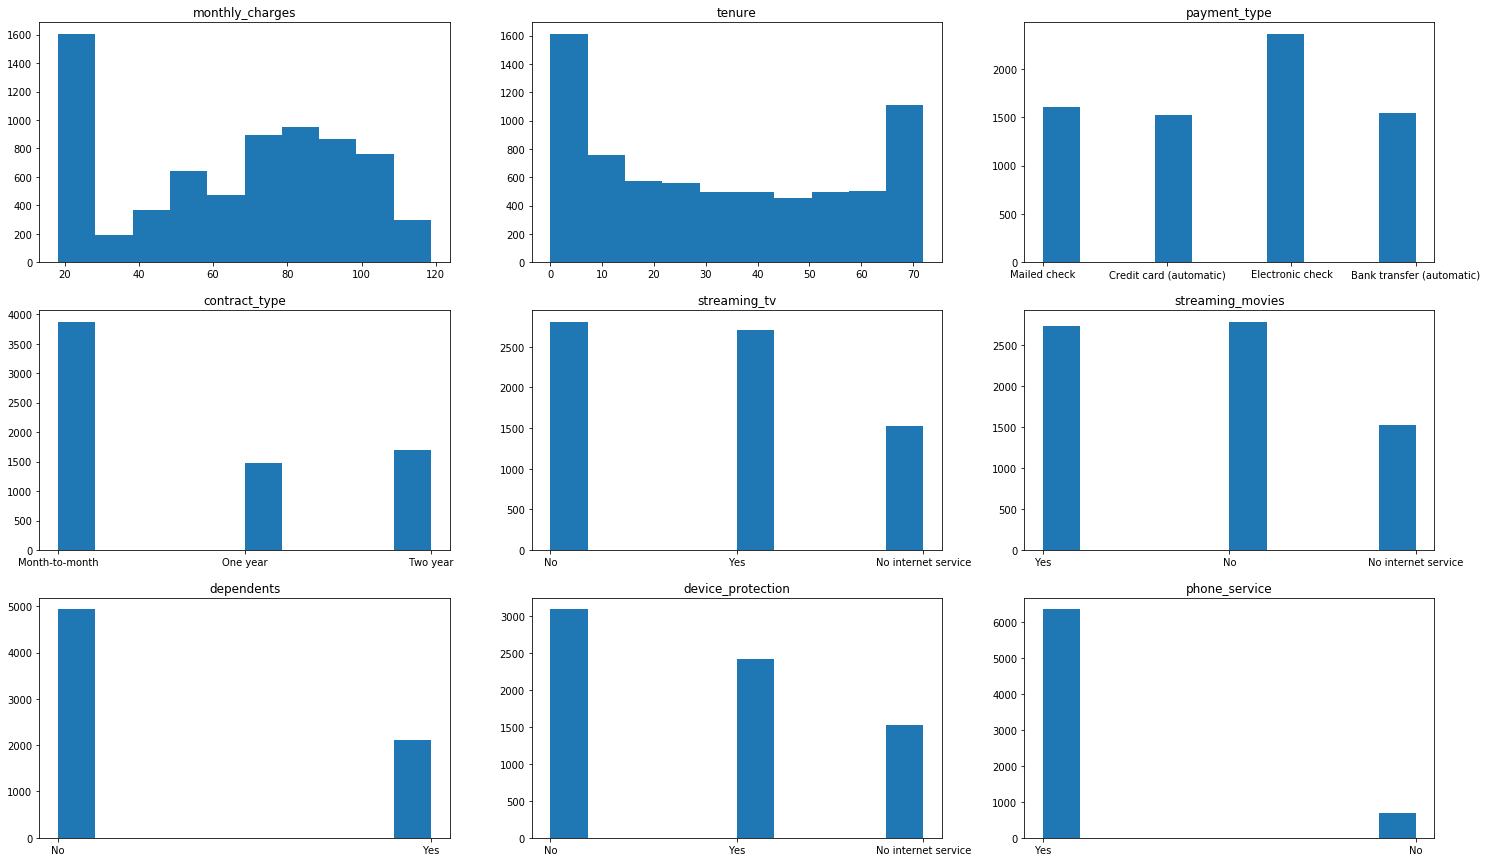

In [9]:
# Plot distribution with subplots of histograms of features

# sets size
plt.subplots(figsize=(25, 15))


plt.subplot(3,3,1);
line1 = plt.hist(df.monthly_charges)
plt.title('monthly_charges');

plt.subplot(3,3,2);
line2 = plt.hist(df.tenure);
plt.title('tenure');

plt.subplot(3,3,3);
line3 = plt.hist(df.payment_type);
plt.title('payment_type');

plt.subplot(3,3,4);
line4 = plt.hist(df.contract_type);
plt.title('contract_type');

plt.subplot(3,3,5);
line1 = plt.hist(df.streaming_tv)
plt.title('streaming_tv');

plt.subplot(3,3,6);
line2 = plt.hist(df.streaming_movies);
plt.title('streaming_movies');

plt.subplot(3,3,7);
line3 = plt.hist(df.dependents);
plt.title('dependents');

plt.subplot(3,3,8);
line4 = plt.hist(df.device_protection);
plt.title('device_protection');

plt.subplot(3,3,9);
line4 = plt.hist(df.phone_service);
plt.title('phone_service');

# Prepare

In [10]:
train, validate, test = prepare.telco_prep(df)

In [11]:
print(train.shape)
print(validate.shape)
print(test.shape)

(3943, 23)
(1691, 23)
(1409, 23)


In [12]:
train.head()

,internet_service_type_id,contract_type_id,payment_type_id,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,churn,payment_type,contract_type,internet_service_type,tenure_years
5670,3,1,4,Male,0,No,Yes,5,Yes,No,...,0,0,0,No,20.35,0,Credit card (automatic),Month-to-month,None,0.42
4152,2,1,1,Female,0,No,No,6,Yes,No,...,1,0,1,Yes,89.25,0,Electronic check,Month-to-month,Fiber optic,0.50
4890,2,2,1,Male,0,No,No,54,Yes,No,...,1,0,0,No,84.40,0,Electronic check,One year,Fiber optic,4.50
2391,1,3,3,Female,0,Yes,No,72,Yes,Yes,...,1,0,0,No,64.75,0,Bank transfer (automatic),Two year,DSL,6.00
2896,2,1,3,Male,0,Yes,No,28,Yes,No,...,1,0,0,No,76.55,0,Bank transfer (automatic),Month-to-month,Fiber optic,2.33


# Exploration

- Does a streaming service increase customer loyalty?


- Null Hypothesis: Churn is independent of streaming services.`  


- Alternative Hypothesis: Customers with streaming services are less likely to churn.` 



In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5670 to 6867
Data columns (total 23 columns):
internet_service_type_id    3943 non-null int64
contract_type_id            3943 non-null int64
payment_type_id             3943 non-null int64
gender                      3943 non-null object
senior_citizen              3943 non-null int64
partner                     3943 non-null object
dependents                  3943 non-null object
tenure_months               3943 non-null int64
phone_service               3943 non-null object
multiple_lines              3943 non-null object
online_security             3943 non-null int64
online_backup               3943 non-null int64
device_protection           3943 non-null int64
tech_support                3943 non-null int64
streaming_tv                3943 non-null int64
streaming_movies            3943 non-null int64
paperless_billing           3943 non-null object
monthly_charges             3943 non-null float64
churn             

In [14]:
support_streaming_subset = train[['online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'churn']]

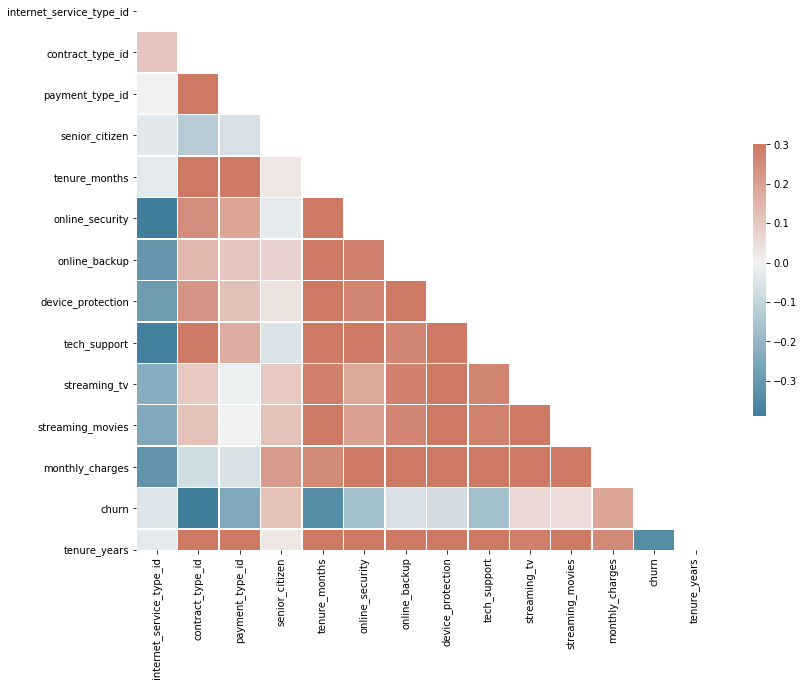

In [17]:
# Correlation heat map
# creating the correlation of each feature against each other
corr = train.corr()

# Generate a mask for the upper triangle, prints out only the bottom triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure, sets size
f, ax = plt.subplots(figsize=(13, 10))

# Generate a custom diverging colormap, changing default colors
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Takeaways from the Heatmap

- I want to look further into which internet_service_type_id strongly correlates with online_security.

- It looks like many of the additional features like online_security, online_backup, device_protection, tech_support, streaming_tv, and streaming_movies have a realationship with internet_service_type_id. 

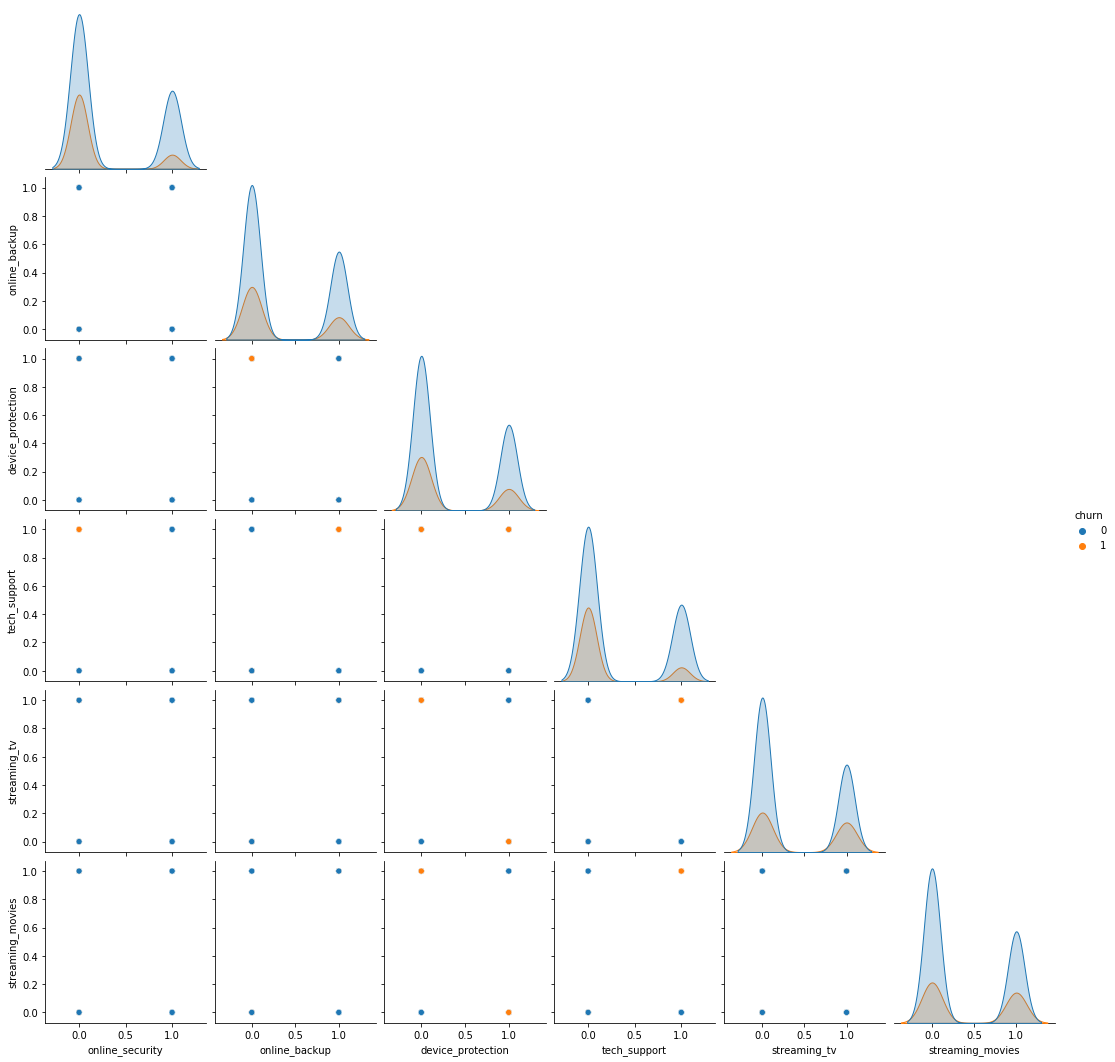

In [18]:
sns.pairplot(data=support_streaming_subset, corner=True, hue='churn')

plt.show()

### Takeaways from Pairplot

- I can see here that customers who have online_security, online_backup, device_protection, and/or tech_support churn less often. This may be an area to run some statistical tests.


- It does not look like there is a big difference in churn whether customers subscribe to streaming_tv or streaming_movies services.


- How can I find out if the same customers who have tech_support have other services as well?

In [ ]:
# Only 15% of customers who have tech support churn.

(train[train.tech_support == 1].churn == 'Yes').mean()

In [ ]:
# as opposed to 31% of customers who don't have tech_support churn.

(train[train.tech_support == 0].churn == 'Yes').mean()

In [ ]:
pd.crosstab(train['tech_support'], train.internet_service_type, values=train.churn, aggfunc='mean')

In [ ]:
# Only 15 % of customers who have online_security churn.

(train[train.online_security == 1].churn == 'Yes').mean()

In [ ]:
# as opposed to 31% of customers who don't have online_security churn.

(train[train.online_security == 0].churn == 'Yes').mean()

In [ ]:
# 23% of customers who have online_backup services churn

(train[train.online_backup == 1].churn == 'Yes').mean()

In [ ]:
# 74% of customers who have tech_support services also have online_security services.

(train.tech_support == train.online_security).mean()

In [ ]:
# Only 28% of customers who have both tech_security and online_security services churn.

(train[train.tech_support == train.online_security].churn == 'Yes').mean()

In [ ]:
# Only 12% of Fiber Customers have tech_support.

((train.tech_support == 1) & (train.internet_service_type == 'Fiber optic')).mean()

In [ ]:
# 16% of DSL customers have tech_support.

((train.tech_support == 1) & (train.internet_service_type == 'DSL')).mean()

In [ ]:
# 29% of customers have tech_support.

((train.tech_support == 1) & (train.internet_service_type != 'None')).mean()

In [19]:
pd.crosstab(train['tech_support'], train.internet_service_type, values=train.churn, aggfunc='mean')

internet_service_type,DSL,Fiber optic,None
tech_support,,,
0,0.275524,0.490506,0.075179
1,0.095385,0.218487,NaN


In [ ]:


# setting alpha value
a = .01

# creating a cross tab of customers with/without streaming movies and is/is not churned
observed1 = pd.crosstab(train.streaming_movies, train.churn)

# scipy function calculates values based on the crosstab created
chi2, p, degf, expected = chi2_contingency(observed1)

print('Observed\n')
print(observed1.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p < a:
    print('\nP is less than alpha. We reject the null hypothesis.')

In [ ]:
# for reference on layout of observed table
observed1

In [ ]:
cat_vars = ['contract_type_id', 'dependents', 'streaming_tv', 'streaming_movies', 'tech_support', 'paperless_billing', 'churn']
quant_vars = ['monthly_charges', 'tenure_months', 'tenure_years']

In [ ]:
explore.explore_univariate(train, cat_vars, quant_vars)

# Modeling & Evaluating

- By predicting that no customers will churn, I am accurate 73% of the time. This is the baseline metric that I need to beat for a model to hold any value.

In [ ]:
# Set my baseline accuracy.

train.churn.value_counts(normalize=True)

In [ ]:
train.head(1)

## Define X and y 



In [27]:
features = ['internet_service_type_id', 'payment_type_id', 'senior_citizen', 'tenure_months', 'streaming_tv','streaming_movies', 'monthly_charges']

In [28]:
X_train = train[features]
y_train = train[['churn']]

X_validate = validate[features]
y_validate = validate[['churn']]

X_test = test[features]
y_test = test[['churn']]

In [29]:
X_train.shape

(3943, 7)

In [30]:
y_train.shape

(3943, 1)

## Create First Logistic Regression Model

In [31]:
# Create a simple Logistic Regression model to start.

logit = LogisticRegression(random_state=123)

### Fit the LR Model

In [32]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Score Model

In [33]:
logit.score(X_train, y_train)

0.786457012427086

### Look at Feature Importance

- Looking at this quick and dirty feature list that I chose to run with, I have learned the following things:

    - By just feeding in the numeric features from my dataframe, I am this first LR model is already beating my baseline accuracy of 73%.
    
    - By narrowing my features down to just monthly_charges and tenure_months, I didn't improve the performance of my quick and dirty LR model, but I still beat my baseline accuracy.
    
    - This tells me I need to go back and do some exploration to find features that are more correlated with churn.

In [34]:
weights = logit.coef_.flatten()

In [35]:
feature_imp_lr = pd.DataFrame(weights, features).reset_index().rename(columns={'index': 'feature', 0: 'weight'})
feature_imp_lr

,feature,weight
0,internet_service_type_id,-0.001621
1,payment_type_id,-0.222730
2,senior_citizen,0.452252
3,tenure_months,-0.049067
4,streaming_tv,-0.004179
5,streaming_movies,-0.052334
6,monthly_charges,0.029616


### Simply Features

- What happens if I just use monthly_charges and tenure_months for features?

In [20]:
X_train = train[['contract_type_id', 'tenure_months', 'monthly_charges']]
y_train = train[['churn']]

X_validate = validate[['contract_type_id', 'tenure_months', 'monthly_charges']]
y_validate = validate[['churn']]

X_test = test[['contract_type_id', 'tenure_months', 'monthly_charges']]
y_test = test[['churn']]

In [21]:
logit = LogisticRegression(random_state=123)
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
features = X_train.columns.tolist()
features

['contract_type_id', 'tenure_months', 'monthly_charges']

In [23]:
weights = logit.coef_.flatten()

In [24]:
pd.DataFrame(weights, features).reset_index().rename(columns={'index': 'feature', 0: 'weight'})

,feature,weight
0,contract_type_id,-1.020285
1,tenure_months,-0.034441
2,monthly_charges,0.027776


In [25]:
logit.score(X_train, y_train)

0.7854425564291149